# Steel Plate Defect Prediction: EDA, Data Splitting, and Preprocessing

This notebook performs Exploratory Data Analysis (EDA), data splitting, and initial data preprocessing steps for the Steel Plate Defect Prediction dataset. The goal is to understand the data characteristics and prepare it for supervised machine learning model training.

## 1. Setup and Library Imports

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib # For saving/loading scaler

# Ensure plots appear inline in the notebook
%matplotlib inline 

# --- EDA Folder Setup ---
eda_folder = 'eda'
try:
    os.makedirs(eda_folder, exist_ok=True)
    print(f"Plots will be saved in the '{eda_folder}' directory.")
except OSError as error:
    print(f"Error creating directory {eda_folder}: {error}")
    eda_folder = None
    print("Proceeding without saving plots due to directory creation error.")

sns.set(style="whitegrid")

print("Libraries imported successfully.")

Plots will be saved in the 'eda' directory.
Libraries imported successfully.


## 2. Data Loading

In [46]:
# Ler dados (Read Data)
try:
    file_path = 'train_test_dataset/train.csv' # Primary path from your script
    if not os.path.exists(file_path):
         alt_path = os.path.join('data', 'train.csv')
         if os.path.exists(alt_path):
             file_path = alt_path
         else:
             alt_path = os.path.join('..', 'data', 'train.csv')
             if os.path.exists(alt_path):
                 file_path = alt_path
             else:
                # Fallback to current directory if others fail
                file_path = 'train.csv' 

    df_train_initial = pd.read_csv(file_path)
    print(f"\nSuccessfully loaded data from: {file_path}")
except FileNotFoundError:
    print(f"\nError: Could not find the file at '{file_path}' or common alternatives.")
    print("Please ensure 'train.csv' is in the correct location or update the 'file_path' variable.")
    df_train_initial = pd.DataFrame() # Create empty df to avoid later errors if file not found

if not df_train_initial.empty:
    print("\n--- 1. Data Loading ---")
    print("Shape of the training data (rows, columns):", df_train_initial.shape)
    print("\nFirst 5 rows of the data:")
    display(df_train_initial.head()) # Use display for richer output in Jupyter

    print("\nColumn Names:")
    print(list(df_train_initial.columns))

    # Identify features and targets
    target_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
    actual_target_columns = [col for col in target_columns if col in df_train_initial.columns]
    if len(actual_target_columns) != len(target_columns):
        print("\nWarning: Not all expected target columns found. Using available ones.")
        target_columns = actual_target_columns

    potential_id_col = 'id'
    cols_to_exclude = target_columns + ([potential_id_col] if potential_id_col in df_train_initial.columns else [])
    feature_columns = [col for col in df_train_initial.columns if col not in cols_to_exclude]

    print(f"\nIdentified {len(feature_columns)} feature columns.")
    print(f"Identified {len(target_columns)} target columns (defect types): {', '.join(target_columns)}")
else:
    print("\nDataFrame is empty. Cannot proceed with EDA.")


Successfully loaded data from: train_test_dataset/train.csv

--- 1. Data Loading ---
Shape of the training data (rows, columns): (19219, 35)

First 5 rows of the data:


,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1



Column Names:
['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

Identified 27 feature columns.
Identified 7 target columns (defect types): Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults


## 3. Exploratory Data Analysis (EDA)

This section explores the dataset's characteristics, including class distribution, data types, missing values, and basic statistical summaries for each attribute.

### 3.a Data Types and Non-Null Values

In [47]:
if not df_train_initial.empty:
    print("\n--- 3.a Data Types and Non-Null Values ---")
    df_train_initial.info()


--- 3.a Data Types and Non-Null Values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plat

*(Content from EDA.md regarding data types and non-null values can be inserted here if it provides more detail than the `.info()` output, e.g., the table from your EDA.md)*

RangeIndex: 19219 entries, 0 to 19218

| # | Column                 | Non-Null Count | Dtype   |
|---|-----------------------|---------------|---------|
| 0 | id                     | 19219 non-null | int64   |
| 1 | X_Minimum              | 19219 non-null | int64   |
| 2 | X_Maximum              | 19219 non-null | int64   |
| ... | ...                  | ...            | ...     |
| 34 | Other_Faults           | 19219 non-null | int64   |

dtypes: float64(13), int64(22) 
memory usage: 5.1 MB 
Missing values: None

### 3.b Missing Values per Column

In [48]:
if not df_train_initial.empty:
    print("\n--- 3.b Missing Values per Column ---")
    missing_values = df_train_initial.isnull().sum()
    missing_values_filtered = missing_values[missing_values > 0]
    if not missing_values_filtered.empty:
        print(missing_values_filtered)
        print(f"Total missing values found: {missing_values.sum()}")
    else:
        print("No missing values found in the training data.")


--- 3.b Missing Values per Column ---
No missing values found in the training data.


### 3.c Statistical Summary for Numerical Features

In [49]:
if not df_train_initial.empty:
    print("\n--- 3.c Statistical Summary for Numerical Features ---")
    # Ensure feature_columns is defined and contains only actual features
    numeric_features_for_summary = [col for col in feature_columns if pd.api.types.is_numeric_dtype(df_train_initial[col])]
    if numeric_features_for_summary:
        stats_summary = df_train_initial[numeric_features_for_summary].describe().T
        display(stats_summary)
        if eda_folder:
            try:
                stats_filename = os.path.join(eda_folder, 'numerical_features_summary.csv')
                stats_summary.to_csv(stats_filename)
                print(f"\nSaved statistical summary to: {stats_filename}")
            except Exception as e:
                print(f"\nCould not save statistical summary: {e}")
    else:
        print("No numeric features found to summarize.")


--- 3.c Statistical Summary for Numerical Features ---


,count,mean,std,min,25%,50%,75%,max
X_Minimum,19219.0,7.098547e+02,5.315442e+02,0.0000,49.00000,7.770000e+02,1.152000e+03,1.705000e+03
X_Maximum,19219.0,7.538576e+02,4.998366e+02,4.0000,214.00000,7.960000e+02,1.165000e+03,1.713000e+03
Y_Minimum,19219.0,1.849756e+06,1.903554e+06,6712.0000,657468.00000,1.398169e+06,2.368032e+06,1.298766e+07
Y_Maximum,19219.0,1.846605e+06,1.896295e+06,6724.0000,657502.00000,1.398179e+06,2.362511e+06,1.298769e+07
Pixels_Areas,19219.0,1.683988e+03,3.730320e+03,6.0000,89.00000,1.680000e+02,6.530000e+02,1.526550e+05
X_Perimeter,19219.0,9.565466e+01,1.778214e+02,2.0000,15.00000,2.500000e+01,6.400000e+01,7.553000e+03
Y_Perimeter,19219.0,6.412410e+01,1.010542e+02,1.0000,14.00000,2.300000e+01,6.100000e+01,9.030000e+02
Sum_of_Luminosity,19219.0,1.918467e+05,4.420247e+05,250.0000,9848.00000,1.823800e+04,6.797800e+04,1.159141e+07
Minimum_of_Luminosity,19219.0,8.480842e+01,2.880034e+01,0.0000,70.00000,9.000000e+01,1.050000e+02,1.960000e+02
Maximum_of_Luminosity,19219.0,1.286474e+02,1.419698e+01,39.0000,124.00000,1.270000e+02,1.350000e+02,2.530000e+02



Saved statistical summary to: eda\numerical_features_summary.csv


*(Content from EDA.md regarding statistical summary can be inserted here, e.g., your analysis of skewness, outliers, scale based on the table above).*

**Key Observations from Statistical Summary:**
- **No Missing Values:** All features have a `count` of 19219.
- **Potential Outliers/Skewness:** Features like `Pixels_Areas`, `X_Perimeter`, `Y_Perimeter`, and `Sum_of_Luminosity` show large differences between their `mean` and `median (50%)`, and their `max` values are far from the 75th percentile, indicating strong right skewness and potential outliers.
- **Varying Scales:** There's a wide range in the scales (magnitudes, standard deviations) of different features (e.g., `Y_Minimum` vs. `Edges_Index`). This suggests scaling will be necessary for many algorithms.
- **Binary/Index Features:** Features like `TypeOfSteel_A300/A400` are binary. Index features (e.g., `Edges_Index`, `Orientation_Index`) mostly fall within expected ranges (e.g., 0-1 or around 0).

### 3.d Target Variable Distribution (Defect Types)


--- 3.d Target Variable Distribution (Defect Types) ---
Counts for each defect type:
Other_Faults    6558
Bumps           4763
K_Scatch        3432
Pastry          1466
Z_Scratch       1150
Stains           568
Dirtiness        485
dtype: int64

Number of samples with no defects: 818
Total number of samples: 19219
Number of samples with at least one defect: 18401

Number of samples with no defects: 818
Total number of samples: 19219
Number of samples with at least one defect: 18401
Saved target distribution plot to: eda\defect_type_distribution.png
Saved target distribution plot to: eda\defect_type_distribution.png


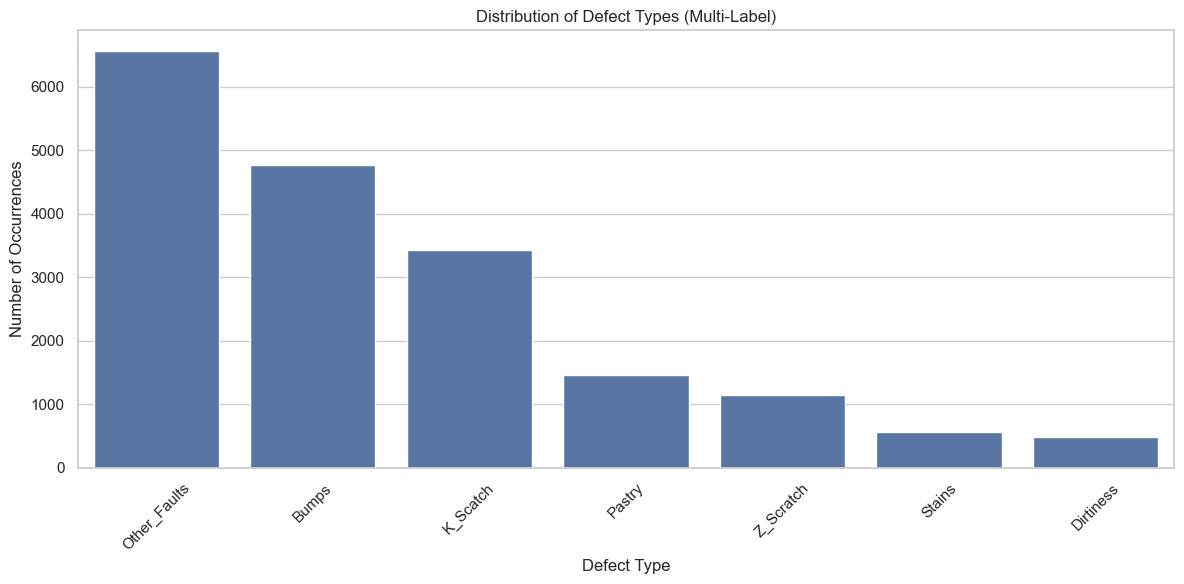

In [50]:
if not df_train_initial.empty:
    print("\n--- 3.d Target Variable Distribution (Defect Types) ---")
    target_counts = df_train_initial[target_columns].sum().sort_values(ascending=False)
    print("Counts for each defect type:")
    print(target_counts)

    no_defect_count = df_train_initial[df_train_initial[target_columns].sum(axis=1) == 0].shape[0]
    print(f"\nNumber of samples with no defects: {no_defect_count}")
    print(f"Total number of samples: {df_train_initial.shape[0]}")
    print(f"Number of samples with at least one defect: {df_train_initial.shape[0] - no_defect_count}")

    plt.figure(figsize=(12, 6))
    sns.barplot(x=target_counts.index, y=target_counts.values)
    plt.title('Distribution of Defect Types (Multi-Label)')
    plt.xlabel('Defect Type')
    plt.ylabel('Number of Occurrences')
    plt.xticks(rotation=45)
    plt.tight_layout()
    if eda_folder:
        try:
            plot_filename_dist = os.path.join(eda_folder, 'defect_type_distribution.png')
            plt.savefig(plot_filename_dist, bbox_inches='tight')
            print(f"Saved target distribution plot to: {plot_filename_dist}")
        except Exception as e:
            print(f"Could not save target distribution plot: {e}")
    plt.show()

*(Content from EDA.md regarding target variable distribution can be inserted here)*
The distribution shows an imbalance among defect types, with 'Other_Faults' being the most common and 'Dirtiness'/'Stains' being the least common. This imbalance might need to be addressed during modeling (e.g., using appropriate metrics, resampling techniques, or class weights).

### 3.e Feature Visualizations

#### Histograms of Numerical Features


--- Generating histograms for numerical features ---
Saved feature histograms plot to: eda\feature_histograms.png
Saved feature histograms plot to: eda\feature_histograms.png


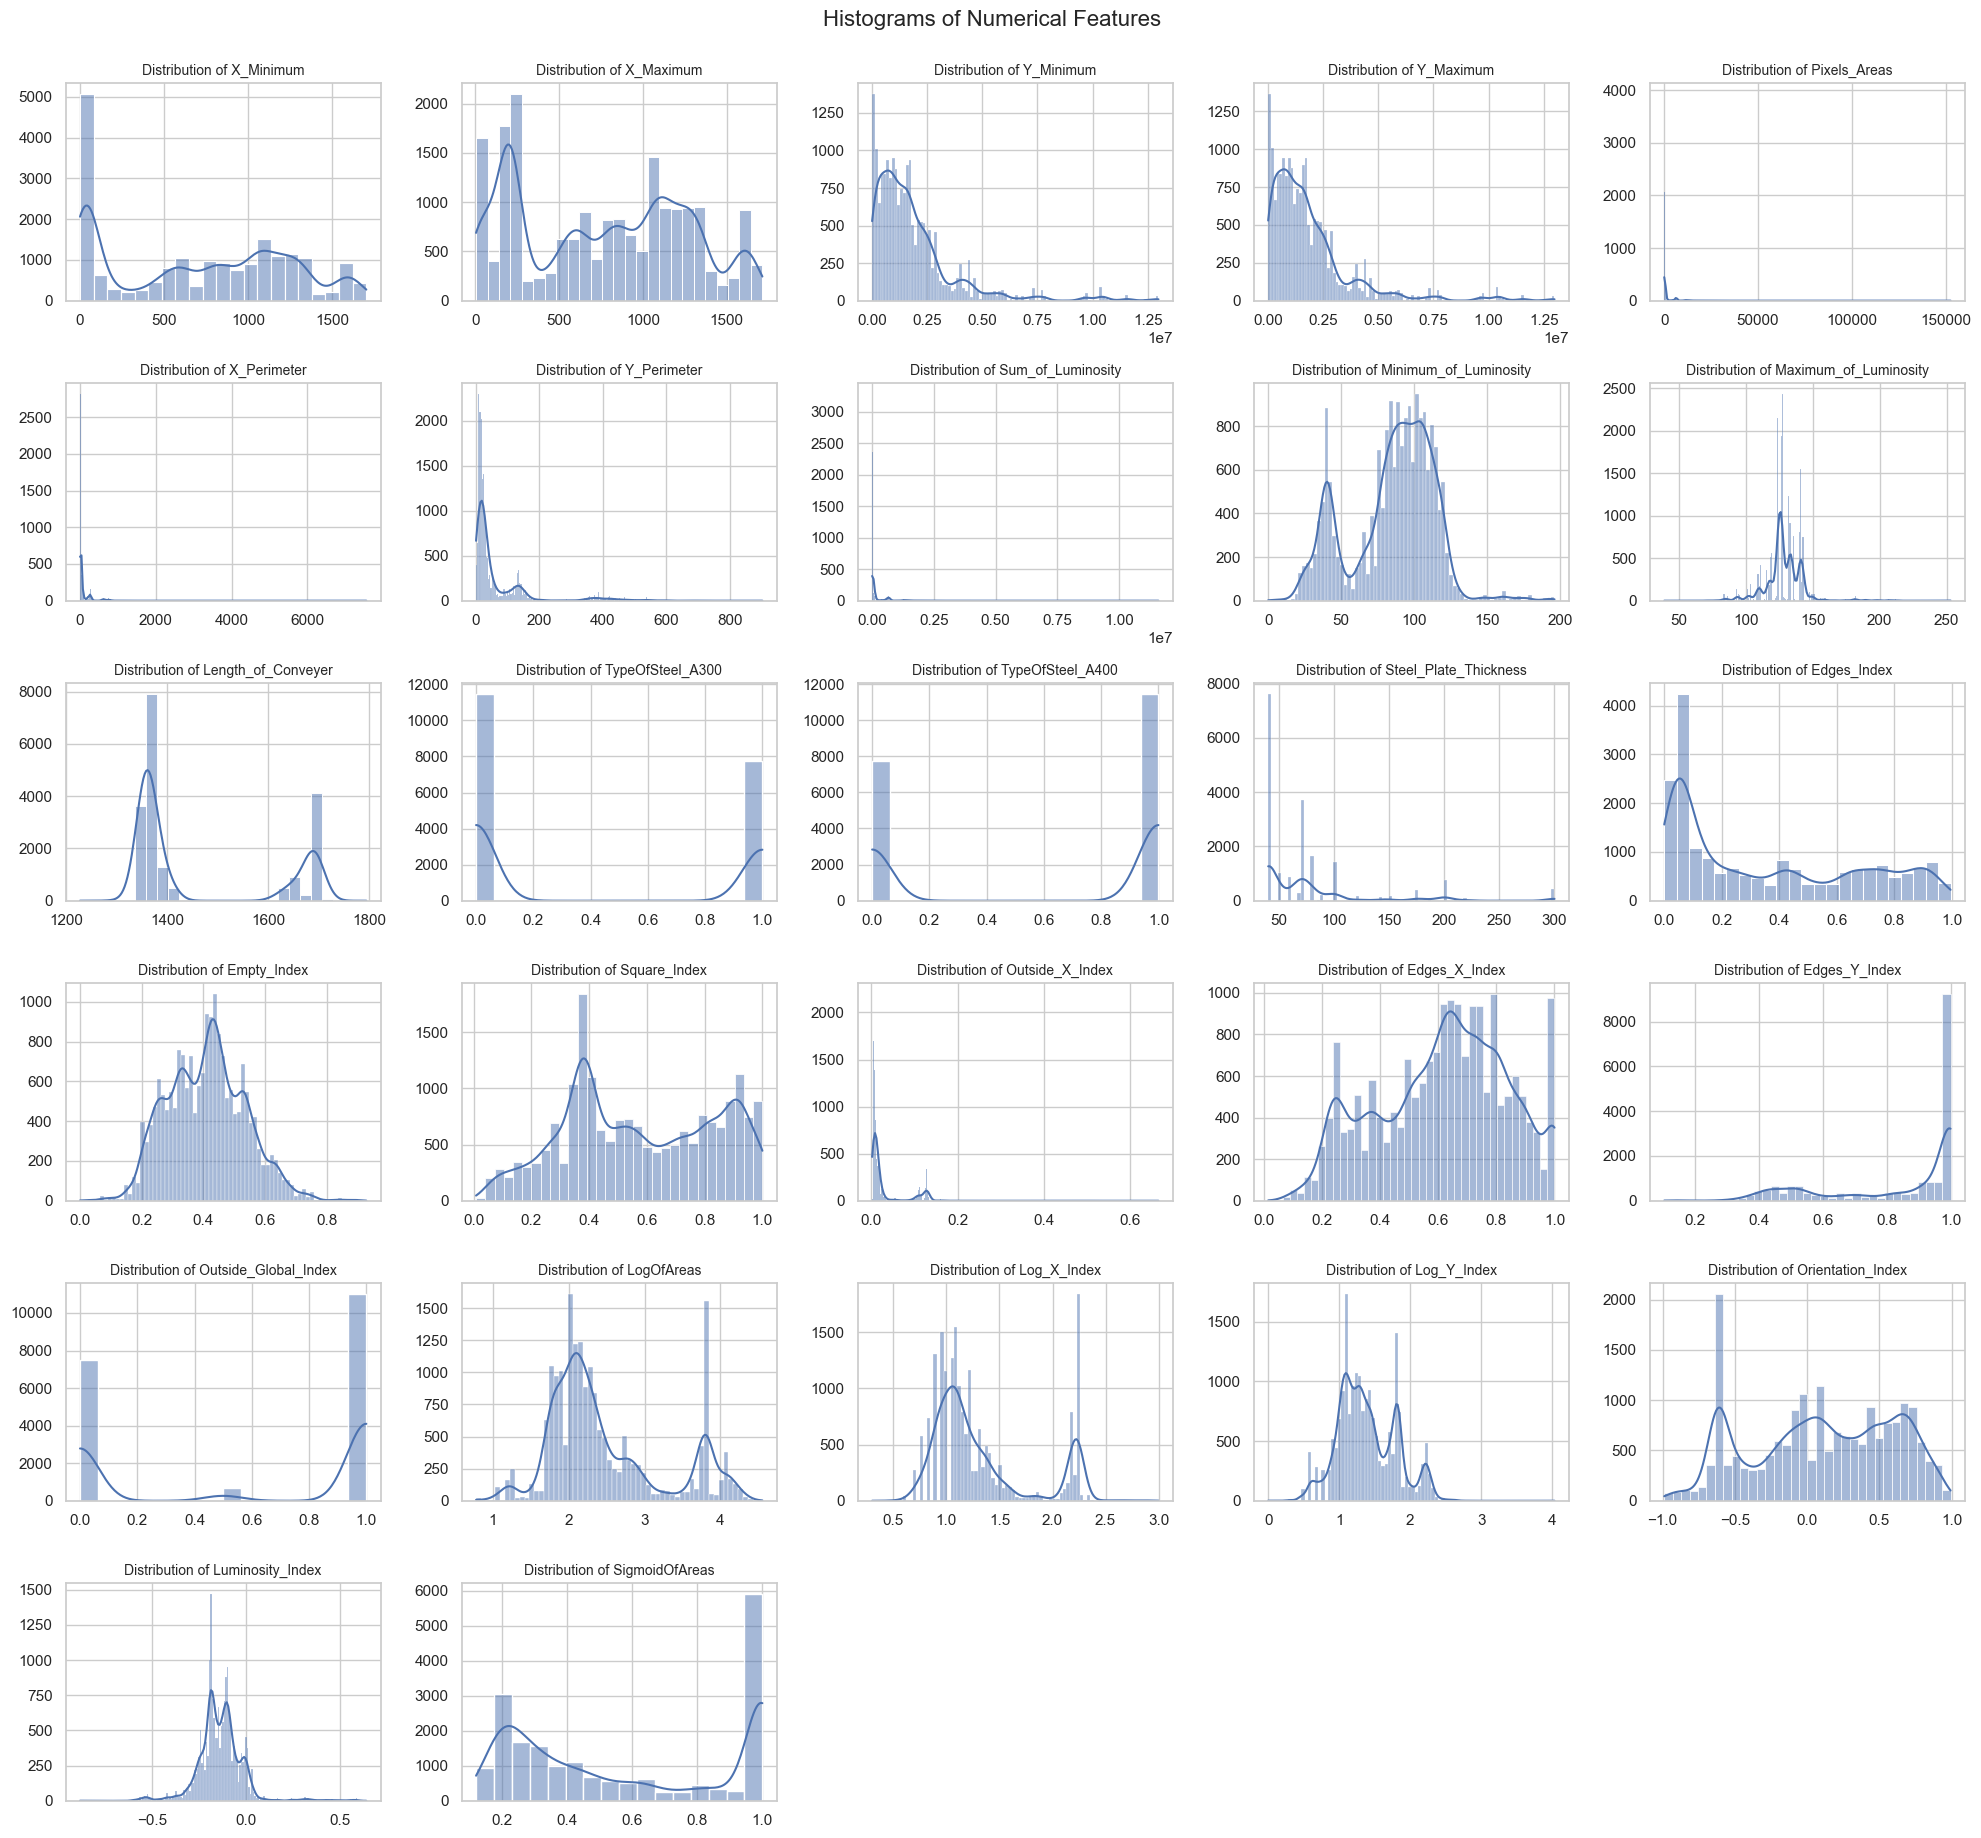

In [51]:
if not df_train_initial.empty:
    print("\n--- Generating histograms for numerical features ---")
    num_features_to_plot = len(feature_columns)
    n_cols = 5 
    n_rows = (num_features_to_plot + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
    axes = axes.flatten()

    for i, col in enumerate(feature_columns[:num_features_to_plot]):
        if pd.api.types.is_numeric_dtype(df_train_initial[col]):
            sns.histplot(df_train_initial[col], kde=True, ax=axes[i])
            axes[i].set_title(f'Distribution of {col}', fontsize=10)
            axes[i].set_xlabel('')
            axes[i].set_ylabel('')
        else:
            axes[i].set_title(f'{col} (Non-Numeric)', fontsize=10)
            axes[i].set_xticks([])
            axes[i].set_yticks([])

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.suptitle('Histograms of Numerical Features', y=1.02, fontsize=16)
    if eda_folder:
        try:
            plot_filename_hist = os.path.join(eda_folder, 'feature_histograms.png') # Save as png for better quality
            plt.savefig(plot_filename_hist, bbox_inches='tight')
            print(f"Saved feature histograms plot to: {plot_filename_hist}")
        except Exception as e:
            print(f"Could not save feature histograms plot: {e}")
    plt.show()

#### Correlation Heatmaps


--- Generating correlation heatmaps ---
Saved feature-target correlation heatmap to: eda\feature_target_correlation_heatmap.png
Saved feature-target correlation heatmap to: eda\feature_target_correlation_heatmap.png


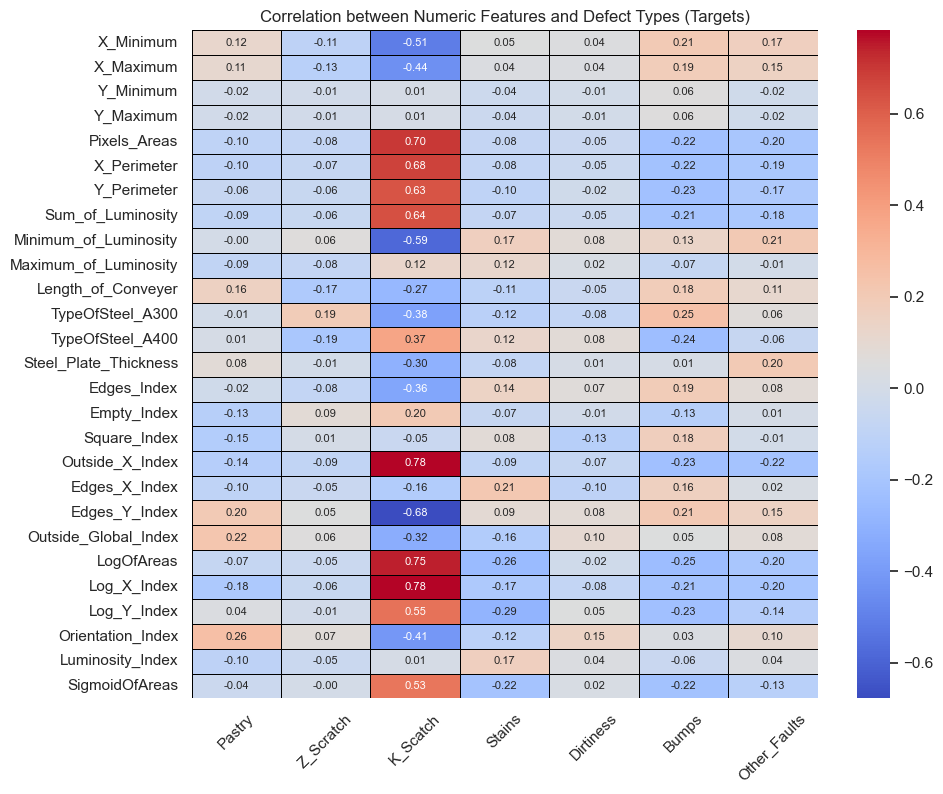

Saved feature-feature correlation heatmap to: eda\feature_feature_correlation_heatmap.png


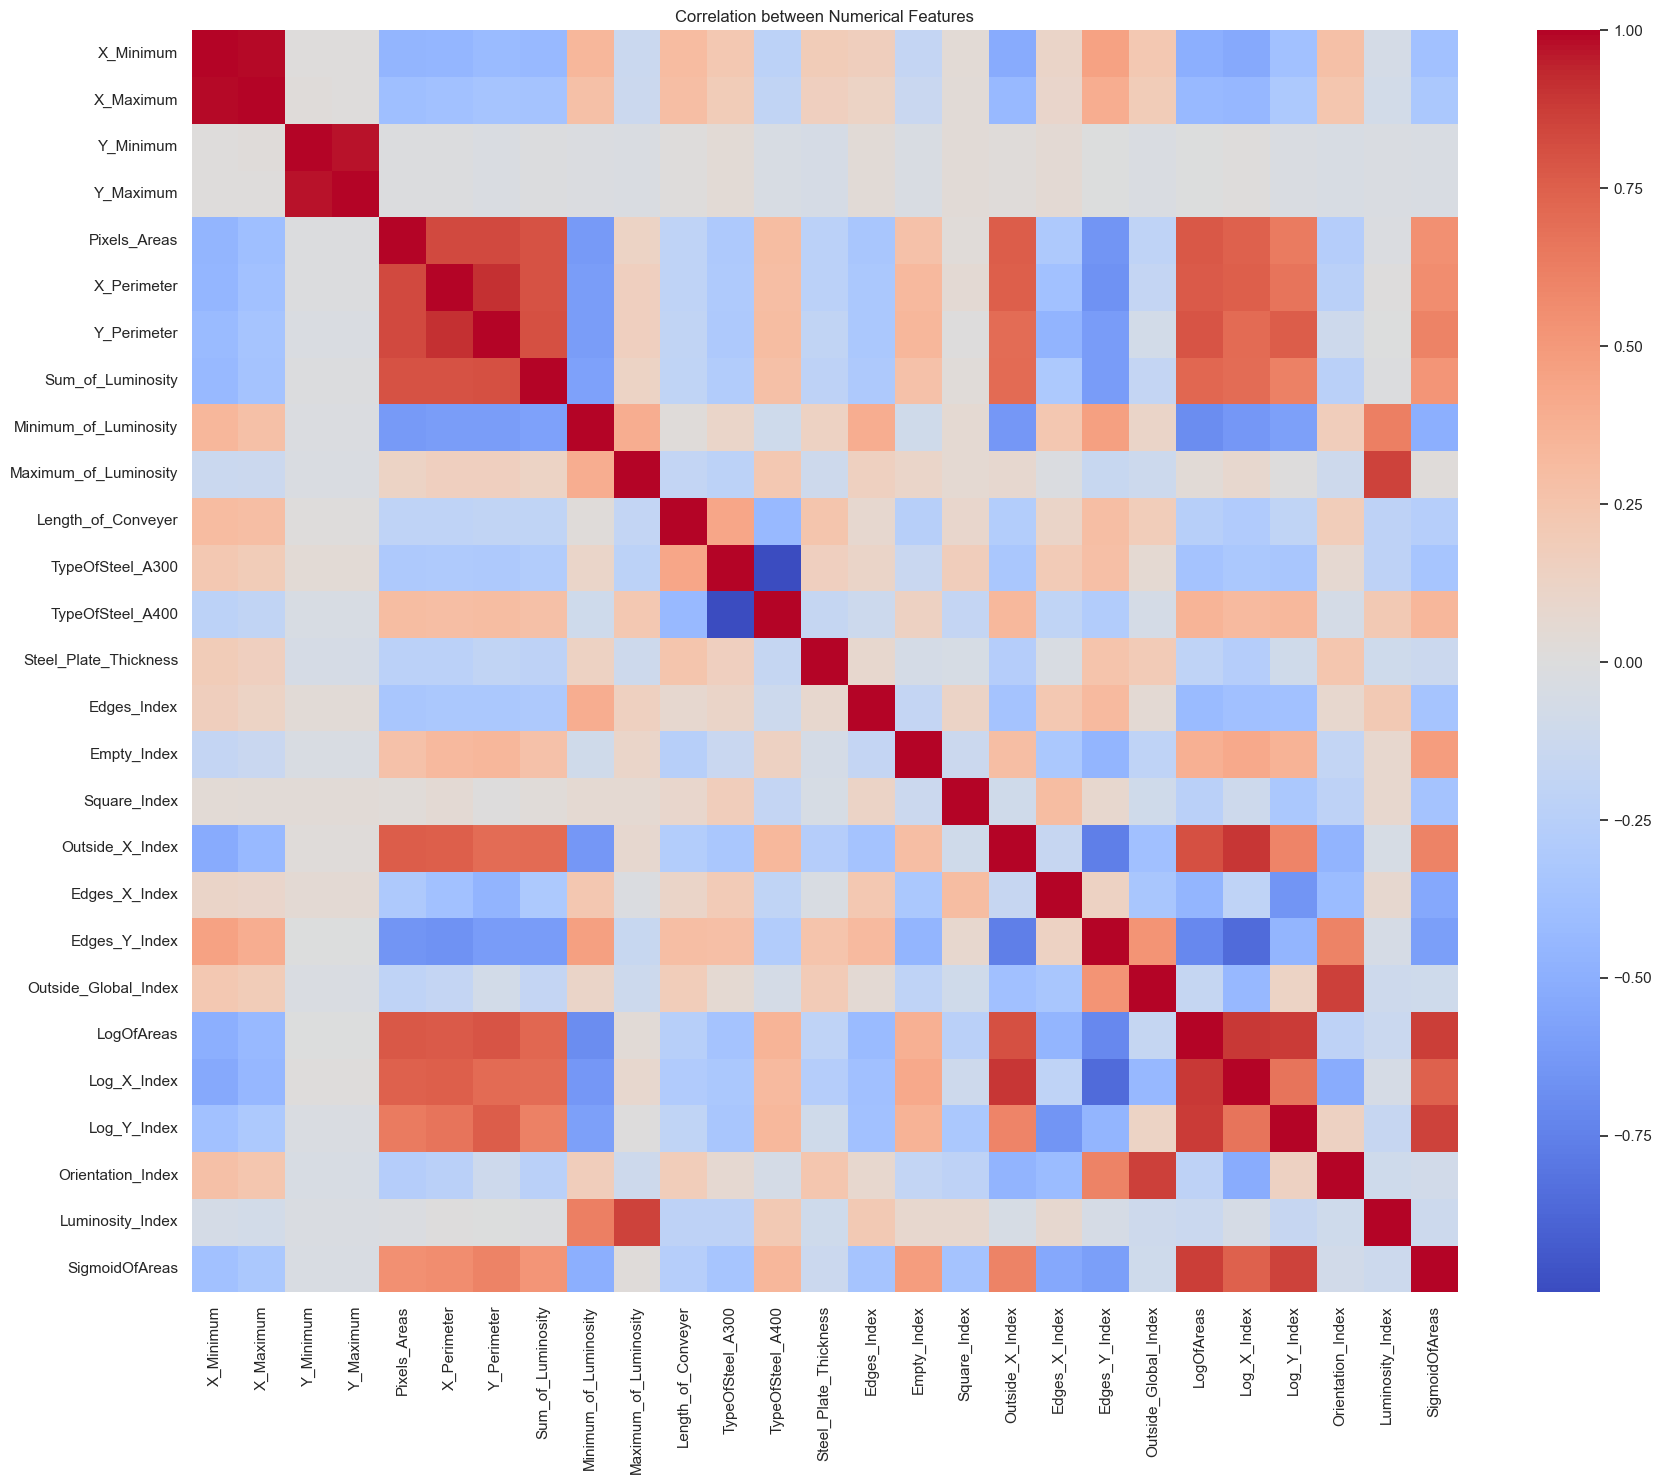

In [52]:
if not df_train_initial.empty:
    print("\n--- Generating correlation heatmaps ---")
    numeric_feature_columns_corr = df_train_initial[feature_columns].select_dtypes(include=np.number).columns.tolist()
    if len(numeric_feature_columns_corr) < len(feature_columns):
        print(f"Warning: Excluded {len(feature_columns)-len(numeric_feature_columns_corr)} non-numeric columns from correlation analysis.")
    
    if numeric_feature_columns_corr and target_columns:
        correlation_matrix = df_train_initial[numeric_feature_columns_corr + target_columns].corr()
        
        # Feature-Target Correlation
        if not correlation_matrix.empty:
            feature_target_corr = correlation_matrix[target_columns].loc[numeric_feature_columns_corr]
            plt.figure(figsize=(10, max(8, len(numeric_feature_columns_corr) * 0.3)))
            sns.heatmap(feature_target_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black', annot_kws={"size": 8})
            plt.title('Correlation between Numeric Features and Defect Types (Targets)')
            plt.xticks(rotation=45)
            plt.yticks(rotation=0)
            plt.tight_layout()
            if eda_folder:
                try:
                    plot_filename_corr_target = os.path.join(eda_folder, 'feature_target_correlation_heatmap.png')
                    plt.savefig(plot_filename_corr_target, bbox_inches='tight')
                    print(f"Saved feature-target correlation heatmap to: {plot_filename_corr_target}")
                except Exception as e:
                    print(f"Could not save feature-target correlation heatmap: {e}")
            plt.show()
        else:
            print("Correlation matrix is empty. Skipping feature-target heatmap.")

        # Feature-Feature Correlation
        if not correlation_matrix.empty and len(numeric_feature_columns_corr) > 1:
            feature_feature_corr = correlation_matrix.loc[numeric_feature_columns_corr, numeric_feature_columns_corr]
            plt.figure(figsize=(18, 15))
            sns.heatmap(feature_feature_corr, annot=False, cmap='coolwarm', fmt=".1f")
            plt.title('Correlation between Numerical Features')
            plt.tight_layout()
            if eda_folder:
                try:
                    plot_filename_corr_features = os.path.join(eda_folder, 'feature_feature_correlation_heatmap.png')
                    plt.savefig(plot_filename_corr_features, bbox_inches='tight')
                    print(f"Saved feature-feature correlation heatmap to: {plot_filename_corr_features}")
                except Exception as e:
                    print(f"Could not save feature-feature correlation heatmap: {e}")
            plt.show()
        elif len(numeric_feature_columns_corr) <=1:
            print("Not enough numeric features (<=1) to generate feature-feature correlation heatmap.")
    else:
        print("Skipping correlation heatmaps (no numeric features or no target columns defined).")

*(Content from EDA.md section `2.e` interpreting the heatmaps can be inserted here)*

**Heatmap Observations:**
- **Feature-Target:** Some features show moderate correlations with specific defect types (e.g., `X_Minimum`, `X_Maximum`, `LogOfAreas` with `K_Scatch`).
- **Feature-Feature:** Several groups of features are highly correlated with each other (e.g., `X_Minimum` and `X_Maximum`; `Y_Minimum` and `Y_Maximum`; `Pixels_Areas` and `Sum_of_Luminosity`; `LogOfAreas` with original area-related features). This indicates multicollinearity, which might be relevant for some models or feature selection.

### 3.f Initial Preprocessing Considerations (Based on EDA)

In [53]:
if not df_train_initial.empty:
    print("\n--- 3.f Initial Preprocessing Considerations (Based on EDA) ---")
    # Re-fetch stats for numeric_feature_columns as defined earlier for consistency
    if numeric_features_for_summary: # Check if list from 3.c is not empty
        stats = df_train_initial[numeric_features_for_summary].describe().T 
    else:
        stats = pd.DataFrame() # Empty dataframe if no numeric features
        
    if not stats.empty:
        if 'std' in stats.columns and 'min' in stats.columns and 'max' in stats.columns:
            min_std_val = stats['std'].replace(0, 1e-6).min()
            max_abs_val = stats[['min', 'max']].abs().max(axis=1)
            meaningful_std = stats['std'].replace(0, 1e-6)
            range_to_std_ratio = (max_abs_val / meaningful_std).max()

            print(f"Debug: min_std_val = {min_std_val}, range_to_std_ratio = {range_to_std_ratio}")

            if range_to_std_ratio > 50:
                 print("- Feature scales vary significantly (based on range to std dev ratio).")
                 print("  Consider Normalization (e.g., MinMaxScaler) or Standardization (e.g., StandardScaler).")
            else:
                 print("- Feature scales seem relatively comparable or scaling might not be strictly required, but still often beneficial.")
        else:
            print("- Could not fully assess feature scales due to missing stats columns (std, min, max).")
    else:
        print("- No numeric features found to assess scales for normalization.")

    if df_train_initial.isnull().sum().sum() > 0:
        print("- Missing values detected. Need an imputation strategy.")
    else:
        print("- No missing values detected. No imputation needed based on this check.")

    non_numeric_actual_features = df_train_initial[feature_columns].select_dtypes(exclude=np.number).columns.tolist()
    if non_numeric_actual_features:
        print(f"- Non-numeric feature columns found: {', '.join(non_numeric_actual_features)}. These may require encoding.")
    else:
        print("- Data types for features seem appropriate (mostly numerical). No obvious categorical encoding needed.")

    print("- Target variables are multi-label binary indicators.")
    if not target_counts.empty:
        min_target_val_count = target_counts.min()
        max_target_val_count = target_counts.max()
        if max_target_val_count / (min_target_val_count + 1e-6) > 5:
            print("- Class imbalance observed in target variables. May need special handling during modeling.")
        else:
            print("- Target variable distribution seems relatively balanced, but monitor metrics closely.")
    else:
        print("- Could not assess target balance (no target counts).")
else:
    print("DataFrame is empty. Skipping preprocessing considerations.")


--- 3.f Initial Preprocessing Considerations (Based on EDA) ---
Debug: min_std_val = 0.047301941353806255, range_to_std_ratio = 42.47520700932078
- Feature scales seem relatively comparable or scaling might not be strictly required, but still often beneficial.
- No missing values detected. No imputation needed based on this check.
- Data types for features seem appropriate (mostly numerical). No obvious categorical encoding needed.
- Target variables are multi-label binary indicators.
- Class imbalance observed in target variables. May need special handling during modeling.


## 4. Data Splitting

The data is split into training and validation sets to evaluate model performance on unseen data.

In [54]:
from sklearn.model_selection import train_test_split

if not df_train_initial.empty:
    print("\n--- Splitting Data into Training and Validation Sets ---")

    X = df_train_initial[feature_columns]
    y = df_train_initial[target_columns]

    # Stratify based on whether a sample has any defect or not, to maintain proportion of defected samples.
    # This is a simple stratification for multi-label; more complex strategies might be needed.
    stratify_col = (y.sum(axis=1) > 0)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=stratify_col 
    )

    print("Training features shape:", X_train.shape)
    print("Validation features shape:", X_val.shape)
    print("Training targets shape:", y_train.shape)
    print("Validation targets shape:", y_val.shape)

    print("\n--- Data Splitting Complete. ---")
else:
    print("DataFrame is empty. Skipping data splitting.")
    # Define empty DFs to prevent errors in next step if needed, though logic should handle it
    X_train, X_val, y_train, y_val = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()


--- Splitting Data into Training and Validation Sets ---
Training features shape: (15375, 27)
Validation features shape: (3844, 27)
Training targets shape: (15375, 7)
Validation targets shape: (3844, 7)

--- Data Splitting Complete. ---


*(Content from Preprocessing.md section on Data Splitting can be inserted here, e.g., the table with shapes)*

| Dataset            | Features Shape | Target Shape |
|-------------------|----------------|--------------|
| Training          | (15375, 27)    | (15375, 7)   |
| Validation        | (3844, 27)     | (3844, 7)    |

## 5. Data Preprocessing

This section covers preprocessing steps applied to the data, such as feature scaling.

### 5.a Feature Scaling (Standardization)

In [55]:
from sklearn.preprocessing import StandardScaler

if not X_train.empty and not X_val.empty:
    print("\n--- 3. Data Preprocessing (Feature Scaling) ---")

    # Identify numeric feature columns from X_train (should be consistent with feature_columns from EDA)
    numeric_cols_to_scale = X_train.select_dtypes(include=np.number).columns.tolist()

    if not numeric_cols_to_scale:
        print("No numeric features identified in X_train for scaling.")
    else:
        print(f"\nApplying StandardScaler to {len(numeric_cols_to_scale)} numeric features: {', '.join(numeric_cols_to_scale)}")

        scaler = StandardScaler()

        # Fit the scaler on the training data's numeric features ONLY
        scaler.fit(X_train[numeric_cols_to_scale])

        # Save the scaler (uncomment if you want to save it)
        if eda_folder:
            scaler_filename = os.path.join(eda_folder, 'standard_scaler.joblib')
            try:
                joblib.dump(scaler, scaler_filename)
                print(f"\nSaved StandardScaler to: {scaler_filename}")
            except Exception as e:
                print(f"\nCould not save StandardScaler: {e}")

        # Transform both training and validation data's numeric features
        # Important to make copies if you want to keep original X_train/X_val numeric values
        X_train_scaled = X_train.copy()
        X_val_scaled = X_val.copy()

        X_train_scaled[numeric_cols_to_scale] = scaler.transform(X_train[numeric_cols_to_scale])
        X_val_scaled[numeric_cols_to_scale] = scaler.transform(X_val[numeric_cols_to_scale])

        print("\nFirst 5 rows of X_train_scaled after scaling numeric features:")
        display(X_train_scaled.head())

        print("\nStatistical summary of scaled numeric features in X_train_scaled (mean ~0, std ~1):")
        display(X_train_scaled[numeric_cols_to_scale].describe().T)
        
        print("\n--- End of Data Preprocessing Step ---")
else:
    print("X_train or X_val is empty. Skipping scaling.")
    X_train_scaled = X_train # Assign to avoid undefined errors if used later
    X_val_scaled = X_val   # Assign to avoid undefined errors if used later


--- 3. Data Preprocessing (Feature Scaling) ---

Applying StandardScaler to 27 numeric features: X_Minimum, X_Maximum, Y_Minimum, Y_Maximum, Pixels_Areas, X_Perimeter, Y_Perimeter, Sum_of_Luminosity, Minimum_of_Luminosity, Maximum_of_Luminosity, Length_of_Conveyer, TypeOfSteel_A300, TypeOfSteel_A400, Steel_Plate_Thickness, Edges_Index, Empty_Index, Square_Index, Outside_X_Index, Edges_X_Index, Edges_Y_Index, Outside_Global_Index, LogOfAreas, Log_X_Index, Log_Y_Index, Orientation_Index, Luminosity_Index, SigmoidOfAreas

Saved StandardScaler to: eda\standard_scaler.joblib

First 5 rows of X_train_scaled after scaling numeric features:


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
3231,0.604724,0.585195,1.695658,1.700616,-0.415590,-0.436425,-0.465207,-0.391666,-0.413528,-0.259641,...,-0.448928,0.870661,0.757981,0.847858,-0.409352,-0.228380,-0.388457,0.349609,-0.732168,-0.528365
13310,0.931238,0.918241,0.594889,0.597096,-0.350859,-0.358573,-0.069146,-0.334438,0.663327,-0.118939,...,-0.463960,-1.142842,0.757981,0.847858,0.149007,-0.495654,0.906809,1.053029,0.330760,0.898478
8677,-1.258659,-1.076048,0.075896,0.076750,1.440757,0.703563,0.544749,1.179412,-1.455645,-0.329991,...,2.115054,0.775336,-1.393945,-1.225170,1.807525,1.994764,1.200672,-1.407403,-0.439489,1.295643
460,-1.314954,-1.464934,-0.407933,-0.408239,-0.239543,-0.464230,-0.178063,-0.288500,0.003319,-0.118939,...,-0.500466,1.352678,0.757981,0.847858,0.565148,-0.495654,0.677290,1.671472,-0.240501,1.294136
10382,-1.224882,-1.379180,-0.853584,-0.855004,-0.426695,-0.430865,-0.445404,-0.395310,0.524378,0.865969,...,-0.539119,-0.388790,0.757981,0.847858,-0.600730,-0.763142,-0.327318,1.272245,0.623438,-0.660351



Statistical summary of scaled numeric features in X_train_scaled (mean ~0, std ~1):


,count,mean,std,min,25%,50%,75%,max
X_Minimum,15375.0,-1.432639e-17,1.000033,-1.331843,-1.239894,0.124335,0.829906,1.867621
X_Maximum,15375.0,2.819064e-17,1.000033,-1.494849,-1.076048,0.082634,0.822515,1.913391
Y_Minimum,15375.0,6.932124e-18,1.000033,-0.968344,-0.628431,-0.236277,0.270696,5.859022
Y_Maximum,15375.0,3.119456e-17,1.000033,-0.970057,-0.627642,-0.236386,0.269372,5.874402
Pixels_Areas,15375.0,3.234991e-18,1.000033,-0.452966,-0.430486,-0.409090,-0.278003,40.890716
X_Perimeter,15375.0,9.011762e-18,1.000033,-0.519839,-0.447547,-0.391938,-0.180623,41.470680
Y_Perimeter,15375.0,-1.629049e-17,1.000033,-0.613730,-0.504813,-0.405798,-0.029540,8.307552
Sum_of_Luminosity,15375.0,-2.403136e-17,1.000033,-0.424307,-0.403063,-0.384748,-0.274572,25.230894
Minimum_of_Luminosity,15375.0,2.447040e-16,1.000033,-2.949347,-0.517740,0.177005,0.698064,3.859153
Maximum_of_Luminosity,15375.0,5.961627e-16,1.000033,-6.309796,-0.329991,-0.118939,0.443866,8.745241



--- End of Data Preprocessing Step ---


*(Content from Preprocessing.md on Standardization can be inserted here, including the list of features scaled, and the tables for 'First 5 rows of X_train_scaled' and 'Statistical summary of scaled numeric features')*

**Applied StandardScaler to 27 numeric features:**
```
X_Minimum, X_Maximum, Y_Minimum, Y_Maximum, Pixels_Areas, X_Perimeter, Y_Perimeter, 
Sum_of_Luminosity, Minimum_of_Luminosity, Maximum_of_Luminosity, Length_of_Conveyer, 
TypeOfSteel_A300, TypeOfSteel_A400, Steel_Plate_Thickness, Edges_Index, Empty_Index, 
Square_Index, Outside_X_Index, Edges_X_Index, Edges_Y_Index, Outside_Global_Index, 
LogOfAreas, Log_X_Index, Log_Y_Index, Orientation_Index, Luminosity_Index, SigmoidOfAreas
```
The scaled features now have a mean close to 0 and a standard deviation close to 1, which is the expected outcome of Standardization.

## Next Steps

With the data loaded, explored, split, and preprocessed (scaled), the next phase will involve selecting, training, and evaluating supervised learning models.